In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread('wanchinpa.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, dsize = (320, 480))
cap = cv2.VideoCapture(0)

In [3]:
while cap.isOpened():
    ret, frame = cap.read()
    img2 = frame[0:500, 0:500]
    
    sift = cv2.SIFT_create()
    
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k = 2)
    
    good = []
    for m, n in matches:
        if m.distance < 0.5 * n.distance:
            good.append([m])
    
    img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags = 2)
    
    cv2.imshow('result', img3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

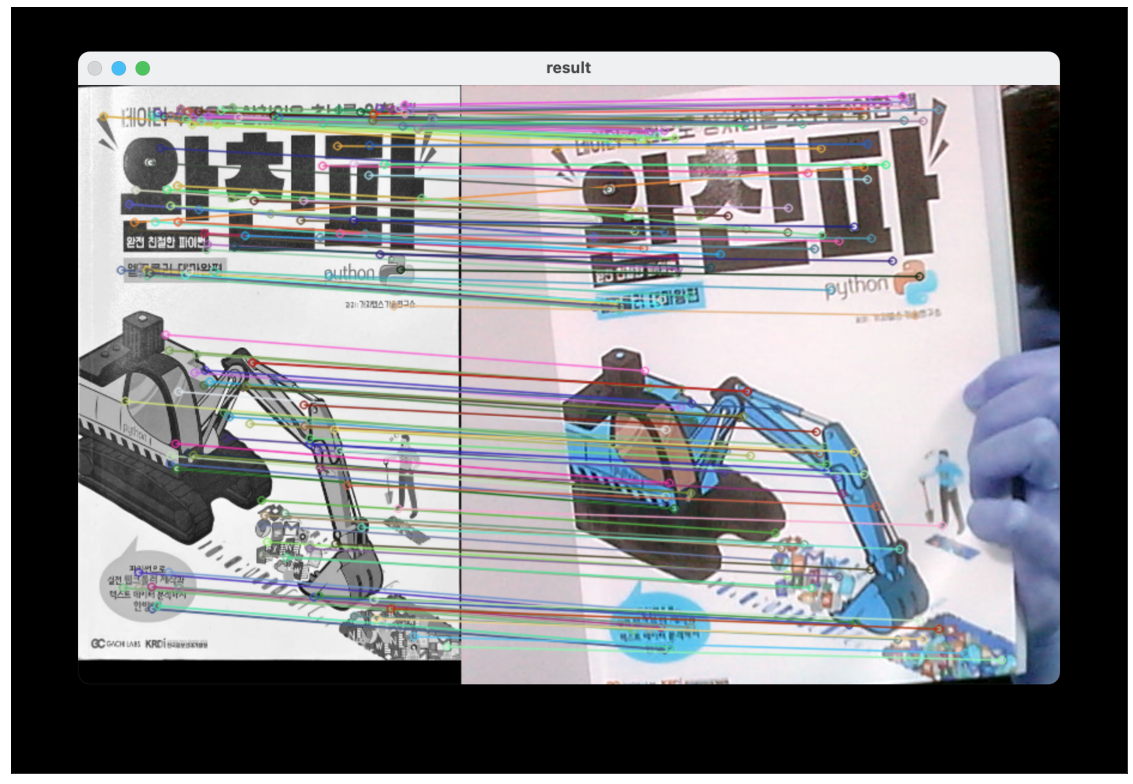

In [15]:
result_img = cv2.imread('hm6_result.png')
plt.rcParams['figure.figsize'] = (20, 20)
plt.imshow(result_img)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()